In [1]:
# Prereqs
# Installed twarc https://github.com/DocNow/twarc
# Downloaded some tweets using my own API Key into a file
#Ex - twarc search election --geocode 39.833333,-98.583333,1000mi > election_keyword_tweets.json

import pandas as pd

CHUNK_SIZE = 10000
PATH = '~/Documents/tweet_feed/election_keyword_tweets.json'

In [2]:
%%time
tweet_df = pd.concat(pd.read_json(PATH, lines=True, chunksize=CHUNK_SIZE))
tweet_df.head()

CPU times: user 8.98 s, sys: 575 ms, total: 9.56 s
Wall time: 9.59 s


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,None,2019-09-14 21:36:15,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @SkolHuskers: @BernieSanders @BernieSanders...,None,...,NaN,NaN,NaN,NaN,1,False,{'created_at': 'Sat Sep 14 01:28:11 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 1164428065, 'id_str': '1164428065', 'na..."
1,NaN,None,2019-09-14 21:36:11,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,Stupidities running rampant in Canada. Electio...,None,...,0.0,{'created_at': 'Sat Sep 14 20:25:00 +0000 2019...,1.172970e+18,1.172970e+18,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 822951019101364225, 'id_str': '82295101..."
2,NaN,None,2019-09-14 21:36:06,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @poormansurvivor: CNBC Poll: Majority of Bu...,None,...,0.0,NaN,NaN,NaN,7,False,{'created_at': 'Fri Sep 13 19:08:21 +0000 2019...,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,"{'id': 581193742, 'id_str': '581193742', 'name..."
3,NaN,None,2019-09-14 21:36:05,"[31, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,@MarkYoungTruth @BernieSanders Last election I...,None,...,NaN,NaN,NaN,NaN,0,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,"{'id': 3075241872, 'id_str': '3075241872', 'na..."
4,NaN,None,2019-09-14 21:36:04,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1168343866195492864, 'id_str...",0,False,RT @DiamondandSilk: OMG OMG. They lied to us a...,None,...,0.0,NaN,NaN,NaN,1537,False,{'created_at': 'Sat Sep 14 18:20:11 +0000 2019...,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,"{'id': 756256693625815040, 'id_str': '75625669..."


In [23]:

truncated_tweet_df = tweet_df[['id', 'created_at', 'display_text_range', 'entities', 'favorite_count', 'full_text', 'retweet_count', 'retweeted']]
truncated_tweet_df = truncated_tweet_df.set_index('id')
truncated_tweet_df.head()

,created_at,display_text_range,entities,favorite_count,full_text,retweet_count,retweeted
id,,,,,,,
1172987447791063041,2019-09-14 21:36:15,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0,RT @SkolHuskers: @BernieSanders @BernieSanders...,1,False
1172987432381353989,2019-09-14 21:36:11,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...",0,Stupidities running rampant in Canada. Electio...,0,False
1172987408989577217,2019-09-14 21:36:06,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0,RT @poormansurvivor: CNBC Poll: Majority of Bu...,7,False
1172987405244256256,2019-09-14 21:36:05,"[31, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...",0,@MarkYoungTruth @BernieSanders Last election I...,0,False
1172987402379350016,2019-09-14 21:36:04,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...",0,RT @DiamondandSilk: OMG OMG. They lied to us a...,1537,False


In [24]:
print (truncated_tweet_df['full_text'].count)

<bound method Series.count of id
1172987447791063041    RT @SkolHuskers: @BernieSanders @BernieSanders...
1172987432381353989    Stupidities running rampant in Canada. Electio...
1172987408989577217    RT @poormansurvivor: CNBC Poll: Majority of Bu...
1172987405244256256    @MarkYoungTruth @BernieSanders Last election I...
1172987402379350016    RT @DiamondandSilk: OMG OMG. They lied to us a...
1172987381948936192    RT @NanaKimmieB: Listen up gun owning men, Sne...
1172987375049478144    RT @MarilynRMarks1: NC voters--this is a serio...
1172987368300847104    @RepSlotkin “As election administrators, we kn...
1172987333332701184    RT @NanaKimmieB: Listen up gun owning men, Sne...
1172987301821079553    RT @haaretzcom: Israel's election board rules ...
1172987301514760192    RT @haaretzcom: KING BIBI or BYE BYE BIBI?\nTw...
1172987297140264961    @realDonaldTrump “As election administrators, ...
1172987279503167489    @GordonTrema @DianeBohallGray The funniest par...
117298727597983334

In [25]:
truncated_tweet_df.dtypes

created_at            datetime64[ns]
display_text_range            object
entities                      object
favorite_count                 int64
full_text                     object
retweet_count                  int64
retweeted                       bool
dtype: object

In [26]:
truncated_tweet_df.describe()

,favorite_count,retweet_count
count,35982.000000,35982.000000
mean,1.552971,444.715497
std,41.088248,1348.980772
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,63.000000
75%,0.000000,339.000000
max,4415.000000,43337.000000


In [27]:
truncated_tweet_df.retweet_count.describe().apply(lambda x: format(x))

count               35982.0
mean      444.7154966372075
std      1348.9807717501626
min                     0.0
25%                     1.0
50%                    63.0
75%                   339.0
max                 43337.0
Name: retweet_count, dtype: object

In [28]:
truncated_tweet_df['day'] = pd.to_datetime(truncated_tweet_df['created_at']).dt.day

In [30]:
truncated_tweet_df.day

id
1172987447791063041    14
1172987432381353989    14
1172987408989577217    14
1172987405244256256    14
1172987402379350016    14
1172987381948936192    14
1172987375049478144    14
1172987368300847104    14
1172987333332701184    14
1172987301821079553    14
1172987301514760192    14
1172987297140264961    14
1172987279503167489    14
1172987275979833344    14
1172987274843185152    14
1172987274365210625    14
1172987256719560704    14
1172987251996774400    14
1172987241645232129    14
1172987239376347139    14
1172987225023234049    14
1172987198766895104    14
1172987185055842304    14
1172987183185240065    14
1172987180303691776    14
1172987177640353792    14
1172987171755765761    14
1172987163262275585    14
1172987162758930438    14
1172987159869083649    14
                       ..
1172571384452669440    13
1172571373266493441    13
1172571363317624834    13
1172571338948694016    13
1172571337610498049    13
1172571337149140994    13
1172571318056837121    13
117257131

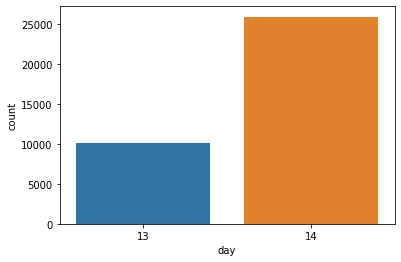

In [31]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='day', data=truncated_tweet_df)

In [35]:
import re

truncated_tweet_df['hashtags'] = truncated_tweet_df['full_text'].apply(lambda x: re.findall(r"#(\w+)", x)) 

In [42]:
truncated_tweet_df.hashtags

id
1172987447791063041                                                   []
1172987432381353989                                                   []
1172987408989577217                                                   []
1172987405244256256                                                   []
1172987402379350016                                                   []
1172987381948936192                                                   []
1172987375049478144                                                   []
1172987368300847104                                                   []
1172987333332701184                                                   []
1172987301821079553                                                   []
1172987301514760192                                                   []
1172987297140264961                                                   []
1172987279503167489                                                   []
1172987275979833344                      [DanMcC

In [49]:
pruned_tweet_df = truncated_tweet_df[truncated_tweet_df.astype(str)['hashtags'] != '[]']
pruned_tweet_df.head()

,created_at,display_text_range,entities,favorite_count,full_text,retweet_count,retweeted,day,hashtags
id,,,,,,,,,
1172987275979833344,2019-09-14 21:35:34,"[0, 140]","{'hashtags': [{'text': 'DanMcCready', 'indices...",0,RT @Greg_Palast: Democrat #DanMcCready suppose...,571,False,14,"[DanMcCready, NorthCarolina, D]"
1172987251996774400,2019-09-14 21:35:28,"[0, 140]","{'hashtags': [{'text': 'NC09', 'indices': [17,...",0,RT @Greg_Palast: #NC09: It was daylight robber...,95,False,14,"[NC09, DanBishop, NorthCarolina]"
1172987142924111875,2019-09-14 21:35:02,"[17, 304]","{'hashtags': [{'text': 'WeDontBelieveYou', 'in...",0,@realDonaldTrump #WeDontBelieveYou One thing y...,0,False,14,"[WeDontBelieveYou, LiarInChief, Loser, Derange..."
1172987112297074688,2019-09-14 21:34:55,"[12, 288]","{'hashtags': [{'text': 'DNCinc', 'indices': [1...",0,"@SAVoltolin By ""coming at"" do you mean an hone...",0,False,14,[DNCinc]
1172987027303759873,2019-09-14 21:34:35,"[0, 140]","{'hashtags': [{'text': 'NC09', 'indices': [17,...",0,RT @Greg_Palast: #NC09: It was daylight robber...,95,False,14,"[NC09, DanBishop, NorthCarolina]"


In [51]:
pruned_tweet_df.created_at.describe()

count                    5213
unique                   5051
top       2019-09-14 16:19:02
freq                        3
first     2019-09-13 18:02:26
last      2019-09-14 21:35:34
Name: created_at, dtype: object